In [1]:
# Import Libraries
# Numpy for numerical computing
import numpy as np

# pandas  for dataframe
import pandas as pd

# Matplolib for visualzation
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

In [4]:
data = '../data/int_online_tx.csv'
tx_df = pd.read_csv(data)
tx_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France


In [ ]:
# Only keep transactions with customerID'
clean_tx_df = tx_df[tx_df.CustomerID.notnull()].copy()

# Convert customer ID's into integers
clean_tx_df['CustomerID'] = clean_tx_df.CustomerID.astype(int) # enable the columns to be easily sorted and group

# Create 'Sales' interaction feature
clean_tx_df['Sales'] = clean_tx_df.Quantity * clean_tx_df.UnitPrice

In [ ]:
# Aggregate inovice data
# Each invoice is one transaction
invoice_data = clean_tx_df.groupby('CustomerID').InvoiceNo.agg(['nunique']) # group customer and by number of transaction made
invoice_data.columns = ['total_transactions']

In [7]:
invoice_data.head()

,total_transactions
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,8


In [33]:
# Aggregate cart-level data (i.e invoice level- )
# cart , different invoice by a customer
cart_data = clean_tx_df.groupby(['CustomerID', 'InvoiceNo']).Sales.agg(['sum'])
cart_data.columns = ['cart_value']

cart_data.head(20)



cart_value
CustomerID InvoiceNo            
12347      537626         711.79
           542237         475.39
           549222         636.25
           556201         382.52
           562032         584.91
           573511        1294.32
           581180         224.82
12348      539318         892.80
           541998         227.44
           548955         367.00
           568172         310.00
12349      577609        1757.55
12350      543037         334.40
12352      544156         296.50
           545323         144.35
           545332         840.30
           546869         120.33
           547390         160.33
           567505         366.25
           568699         266.25

In [ ]:
# reset index
cart_data.reset_index(inplace=True)


In [11]:
cart_data.head()

,CustomerID,InvoiceNo,cart_value
0,12347,537626,711.79
1,12347,542237,475.39
2,12347,549222,636.25
3,12347,556201,382.52
4,12347,562032,584.91


In [12]:
clean_tx_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France,10.2
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France,15.6


In [15]:
# number of missing value
clean_tx_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Sales          0
dtype: int64

In [16]:
# save the cleaned dataset
clean_tx_df.to_csv('../data/processed/cleaned_transactons.csv', index=None)

In [17]:
# check the invoice data
invoice_data.total_transactions.mean()

3.710144927536232

In [18]:
cart_data.cart_value.mean()

609.8249414062499

In [19]:
# some EDA
# dataframe dimension
clean_tx_df.shape

(33698, 9)

In [20]:
clean_tx_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France,10.2
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France,15.6
5,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/10 8:45,0.85,12583,France,40.8
6,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/10 8:45,1.25,12583,France,30.0
7,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/10 8:45,2.95,12583,France,53.1
8,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/10 8:45,2.95,12583,France,70.8
9,536370,22629,SPACEBOY LUNCH BOX,24,12/1/10 8:45,1.95,12583,France,46.8


In [22]:
clean_tx_df.head(10).nunique()

InvoiceNo       1
StockCode      10
Description    10
Quantity        4
InvoiceDate     1
UnitPrice       6
CustomerID      1
Country         1
Sales           9
dtype: int64

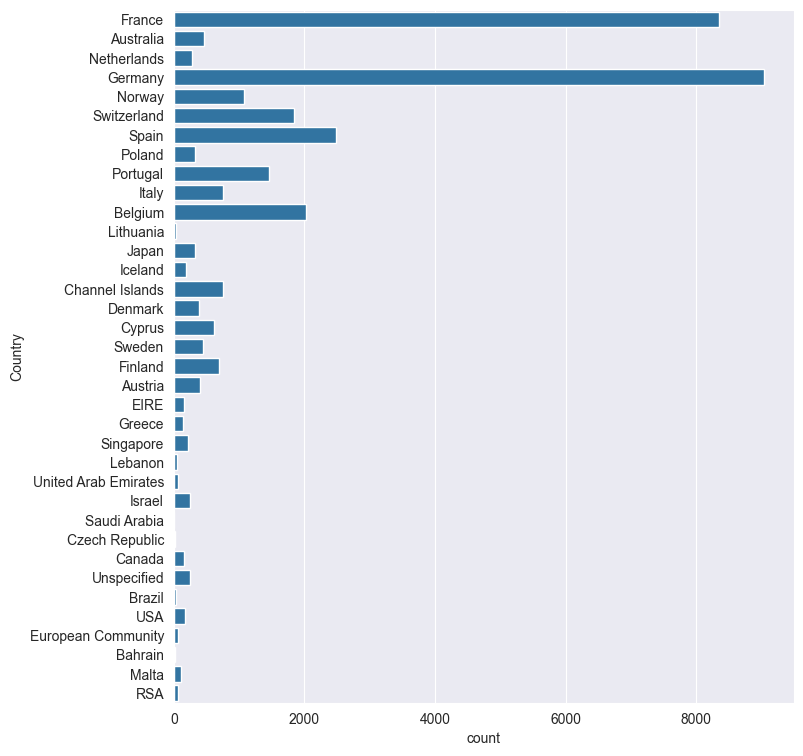

In [23]:
# make the figsize 8x9
plt.figure(figsize=(8, 9))

# Bar plot by country
sns.countplot(y='Country', data=clean_tx_df)
plt.show()

 Alot of sparse class

In [24]:
#  Aggregate product data
product_data = clean_tx_df.groupby('CustomerID').StockCode.agg(['count', 'nunique'])
product_data.columns = ['total_products', 'total_unique_products']

# display product data for first 5 customer
product_data.head()

,total_products,total_unique_products
CustomerID,,
12347,182,103
12348,31,22
12349,73,73
12350,17,17
12352,85,59


In [25]:
# to check that total product is greater than total unique product
all(product_data.total_products >= product_data.total_unique_products)

True

In [26]:
# Roll up sales data
sales_data = clean_tx_df.groupby("CustomerID").Sales.agg(['sum', 'mean'])
sales_data.columns = ['total_sales', 'avg_product_value']

sales_data.head()

,total_sales,avg_product_value
CustomerID,,
12347,4310.00,23.681319
12348,1797.24,57.975484
12349,1757.55,24.076027
12350,334.40,19.670588
12352,2506.04,29.482824


Customer 1237 spent 4310 with the average value of each item 24.63

In [27]:
# cart refers to the a similar group of invoice
cart_data.head()

,CustomerID,InvoiceNo,cart_value
0,12347,537626,711.79
1,12347,542237,475.39
2,12347,549222,636.25
3,12347,556201,382.52
4,12347,562032,584.91


In [28]:
# aggregate cart data at customer- level
agg_cart_data = cart_data.groupby('CustomerID').cart_value.agg(['mean', 'min', 'max'])
agg_cart_data.columns = ['avg_cart_value', 'min_cart_value', 'max_cart_value']

agg_cart_data.head()

,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,
12347,615.714286,224.82,1294.32
12348,449.310000,227.44,892.80
12349,1757.550000,1757.55,1757.55
12350,334.400000,334.40,334.40
12352,313.255000,120.33,840.30


In [29]:
# Merging the ABT
# invoice_data
# product_data
# sales_data
# agg_cart_data

# Join together customer-level ABT
customer_df = invoice_data.join([product_data, sales_data, agg_cart_data])

# Display customer-level data
customer_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30


In [30]:
# save analytical base table
customer_df.to_csv('analytical_base_table.csv')